Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)

##### Importing the Dataset

In [55]:
data = pd.read_csv("tele_cust_churn.csv")

In [56]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Data Cleaning

In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


One strange thing which we are observing here is that we have 'MonthlyCharges' as float64 type and 'TotalCharges' as object type. This mean that we need to figure out and convert it to numeric data type.

Let's check the values of TotalCharges

In [8]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

TotalCharges proved to be the string data type. Now we will convert it to numeric data type.

In [9]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

It is giving a error as because there may be some values that have spaces in the values for TotalCharges, so we need to solve this issue now. 

We will add errors='coerce' to convert everything inside the column values from string to numeric.

In [10]:
pd.to_numeric(data.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Now, lets check the TotalCharges again for the null values after converting it from string to numeric data type

In [11]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()].shape

(11, 21)

In [13]:
data = data.drop(data.index[[488, 753,936,1082,1340,3331,3826,4380,5218,6670,6754]])

We will drop these 11 rows out of total 7043 rows, so that we don't have any null data that can affect our trained model.

In [14]:
data1 = data[data.TotalCharges!='']
data1.shape

(7032, 21)

In [15]:
pd.to_numeric(data1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

After removing the spaces and null values we convert object data type to numeric.

In [16]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

In [17]:
data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now, we have done changing the data type, we will remove the customerID column.

In [19]:
data1.drop('customerID', axis='columns', inplace=True)

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### EDA

#### Client Churn Distribution 

In [21]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

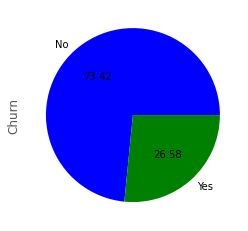

In [22]:
# Through the Visualization
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f', colors=['blue', 'green'])

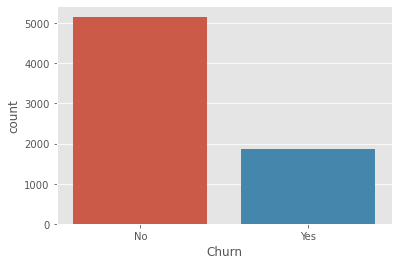

In [23]:
sns.countplot(data['Churn']);

##### Plotting the side by side histogram for Customer Leaving and Not Leaving with respect to their "Tenure"

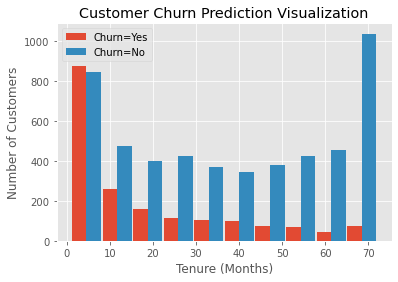

In [24]:
tenure_churn_no = data1[data1.Churn=='No'].tenure
tenure_churn_yes = data1[data1.Churn=='Yes'].tenure

plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'])
plt.legend();

Very clear that those who are with very less Tenure have almost equal chances to Churn. And as the Tenure increases the customers have less tendency to Churn out of the service.

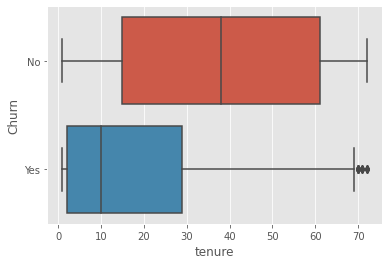

In [25]:
sns.boxplot(x='tenure', y='Churn', data=data1)
plt.show()

Customers with more Tenure tends to Churn less.

##### Plotting the side by side histogram for Customer Leaving and Not Leaving with respect to their "MonthlyCharges"

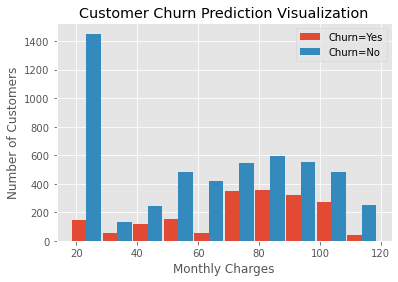

In [26]:
mc_churn_no = data1[data1.Churn=='No'].MonthlyCharges
mc_churn_yes = data1[data1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'])
plt.legend();

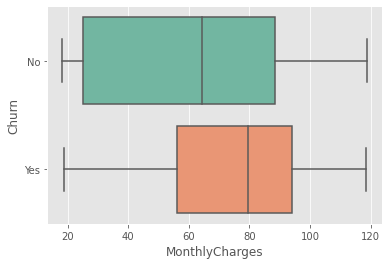

In [27]:
sns.boxplot(x='MonthlyCharges', y='Churn', data=data1, palette="Set2")
plt.show()

Customers with more Monthly Charges tend to Churn more.

##### Contract Type Analysis

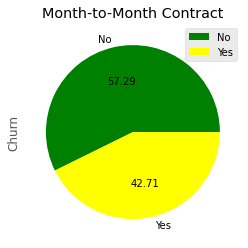

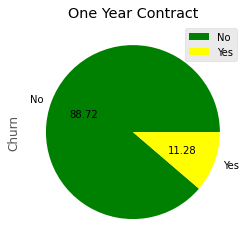

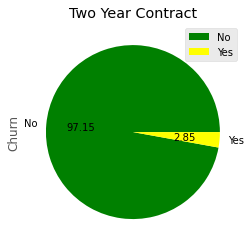

In [28]:
pie_Contract_m2m = pd.DataFrame(data1[data1['Contract']=="Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot(kind='pie', subplots=True, labels=pie_Contract_m2m.index.values, autopct='%.2f', colors=['green', 'yellow'])
plt.title("Month-to-Month Contract")

pie_Contract_1y = pd.DataFrame(data1[data1['Contract']=="One year"]['Churn'].value_counts())
pie_Contract_1y.plot(kind='pie', subplots=True, labels=pie_Contract_1y.index.values, autopct='%.2f', colors=['green', 'yellow'])
plt.title("One Year Contract")

pie_Contract_2y = pd.DataFrame(data1[data1['Contract']=="Two year"]['Churn'].value_counts())
pie_Contract_2y.plot(kind='pie', subplots=True, labels=pie_Contract_2y.index.values, autopct='%.2f', colors=['green', 'yellow'])
plt.title("Two Year Contract");

We see that Customers with One and Two Years of Contract tends to churn a lot lesser than 'Month to Month' Contract

##### Monthly Charges

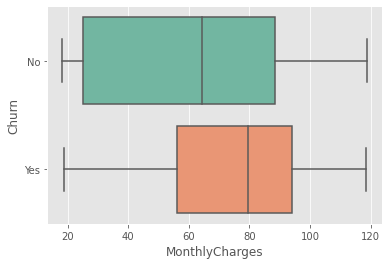

In [29]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = data1, palette="Set2")
plt.show()

Median Monthly Charges are higher for Customers who have "Churned".

##### Gender

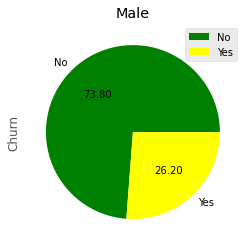

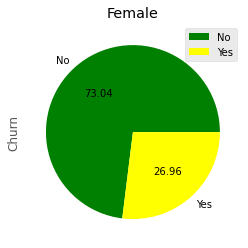

In [30]:
pie_Gender_M = pd.DataFrame(data1[data1['gender']=="Male"]['Churn'].value_counts())
pie_Gender_M.plot(kind='pie', subplots=True, labels=pie_Gender_M.index.values, autopct='%.2f', colors=['green', 'yellow'])
plt.title("Male")

pie_Gender_F = pd.DataFrame(data1[data1['gender']=="Female"]['Churn'].value_counts())
pie_Gender_F.plot(kind='pie', subplots=True, labels=pie_Gender_F.index.values, autopct='%.2f', colors=['green', 'yellow'])
plt.title("Female");

We can see that there is no significant effect of Gender on Churn rate.

##### Dependents

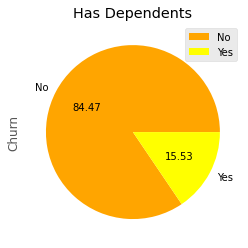

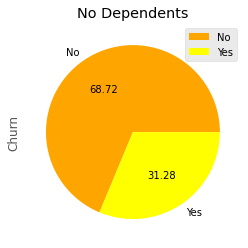

In [31]:
pie_Dependents_Y = pd.DataFrame(data1[data1['Dependents']=="Yes"]['Churn'].value_counts())
pie_Dependents_Y.plot(kind='pie', subplots=True, labels=pie_Dependents_Y.index.values, autopct='%.2f', colors=['orange', 'yellow'])
plt.title("Has Dependents")

pie_Dependents_N = pd.DataFrame(data1[data1['Dependents']=="No"]['Churn'].value_counts())
pie_Dependents_N.plot(kind='pie', subplots=True, labels=pie_Dependents_N.index.values, autopct='%.2f', colors=['orange', 'yellow'])
plt.title("No Dependents");

Customers with No Dependents have high tendency to Churn.

### Data Preprocessing

##### Creating Function to look at the Unique values of each column.

In [32]:
# This Function will search and print for all the unique values in each column.

def print_unique_col_values(dataframe):
    for column in dataframe:
        if dataframe[column].dtype=='object':
            print(f'{column}: {dataframe[column].unique()}')

In [33]:
print_unique_col_values(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


We can see that some of the columns have 'No internet service' or 'No phone service', that can be replaced with a simple "No"

In [34]:
data1.replace('No internet service', 'No', inplace=True)
data1.replace('No phone service', 'No', inplace=True)

Again printing the columns with unique values

In [35]:
print_unique_col_values(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Now we can convert all Yes to 1 and No to 0

In [36]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    data1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [37]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Also converting gender : Male to 0 and Female to 1

In [38]:
data1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

In [39]:
data1.gender.unique()

array([1, 0], dtype=int64)

Now we have to treat the Categorical Columns through :

##### One Hot Encoding

In [40]:
data2 = pd.get_dummies(data=data1, columns=['InternetService', 'Contract', 'PaymentMethod'])
data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [41]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [42]:
data2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Now, we have to scale the columns : Tenure, Monthly Charges, and Total Charges in the range of 0 to 1

In [43]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [44]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


### Splitting the Dataset to TEST and TRAIN  Dataset

In [45]:
from sklearn.model_selection import train_test_split

X = data2.drop('Churn', axis='columns')
y = data2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [46]:
X_train.shape

(5625, 26)

In [47]:
X_test.shape

(1407, 26)

In [48]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2308,0,0,1,1,0.985915,1,0,1,1,1,0,1,1,1,0.859701,0.838865,0,1,0,0,1,0,1,0,0,0
4413,1,1,0,0,0.225352,1,0,0,1,1,0,1,0,1,0.705473,0.170563,0,1,0,1,0,0,0,0,1,0
1943,0,0,0,0,0.000000,1,1,0,0,0,0,0,0,1,0.313930,0.003577,1,0,0,1,0,0,0,1,0,0
5128,1,1,1,0,0.647887,1,1,0,0,1,0,1,1,0,0.810448,0.545627,0,1,0,1,0,0,0,0,1,0
5904,1,0,0,0,0.971831,1,1,0,1,0,0,1,1,0,0.802488,0.786961,0,1,0,0,1,0,0,0,1,0
1431,1,0,1,0,0.591549,1,1,0,0,0,1,1,0,1,0.463682,0.333418,1,0,0,0,1,0,1,0,0,0
1247,1,0,1,1,0.323944,1,1,0,1,1,0,0,0,0,0.645771,0.232431,0,1,0,0,1,0,1,0,0,0
3357,1,0,0,1,0.000000,1,0,0,0,1,0,0,1,0,0.407463,0.004662,1,0,0,1,0,0,0,0,1,0
1189,0,0,0,0,0.028169,1,0,0,0,1,0,0,1,0,0.671144,0.027458,0,1,0,1,0,0,0,1,0,0
2430,0,0,0,0,0.408451,1,0,1,0,1,0,0,0,1,0.372139,0.188674,1,0,0,0,0,1,0,0,0,1


### Modelling the Data

##### 1. Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
result_lr = model_lr.fit(X_train, y_train)

In [52]:
from sklearn import metrics

prediction_lr = model_lr.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_lr))

0.8024164889836531


##### 2. Random Forest  

In [53]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
result_rf = model_rf.fit(X_train, y_train)

# Make predictions

prediction_rf = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_rf))

0.7981520966595593


##### 3. Support Vector Machine

In [54]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
resul_svm = model_svm.fit(X_train,y_train)

pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.7938877043354655

Here the Logistic Regression gives the best result of 80%.